In [1]:
from __future__ import print_function

import numpy as np
import matplotlib.pyplot as plt

def read_data(filename):
    with open(filename, 'r') as f:
        lines = f.readlines()
    
    num_points = len(lines)
    dim_points = 28 * 28
    data = np.empty((num_points, dim_points))
    labels = np.empty(num_points)
    
    for ind, line in enumerate(lines):
        num = line.split(',')
        labels[ind] = int(num[0])
        data[ind] = [ int(x) for x in num[1:] ]
        
    return (data, labels)

train_data, train_labels = read_data("MNIST/sample_train.csv")
test_data, test_labels = read_data("MNIST/sample_test.csv")
print(train_data.shape, test_data.shape)
print(train_labels.shape, test_labels.shape)

(6000, 784) (1000, 784)
(6000,) (1000,)


In [2]:
from sklearn.decomposition import PCA
def get_pca(X,k):
    pca= PCA(n_components=2,svd_solver='full')
    x_k = pca.fit_transform(X)
    return x_k

PCA_Data_All=[]

for i in range (10):
    labels=np.where(test_labels==i)
    data=test_data[labels,:]
    data.shape=(np.size(labels),784)
    reduced_data = get_pca(data, 2)
    PCA_Data_All.append(reduced_data)
    
dataset = np.array(PCA_Data_All)
print(dataset.shape)

(10, 100, 2)


In [8]:
from sklearn import cluster
from sklearn.cluster import KMeans
import random
from sklearn.metrics import silhouette_samples, silhouette_score

dataset=dataset.reshape(1000,2)
random.seed(3)
km_labels=cluster.KMeans(n_clusters=10,max_iter=300,init='k-means++',n_init=10).fit_predict(dataset)

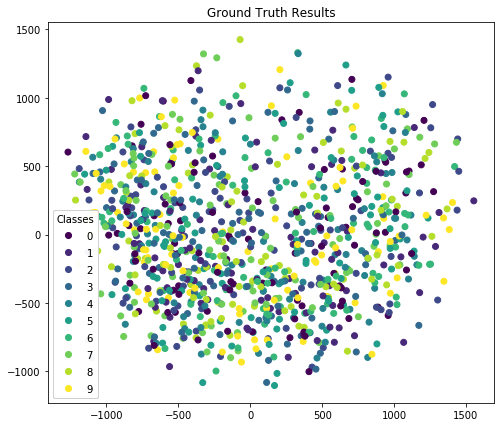

In [4]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
scatter = ax.scatter(dataset[:,0],dataset[:,1],c=test_labels)
plt.title("Ground Truth Results")
ax.add_artist(ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes"))

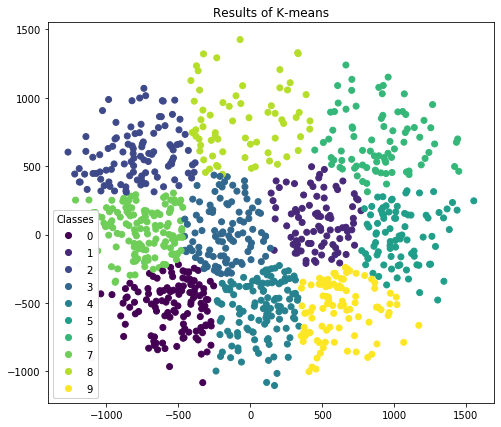

In [5]:
fig = plt.figure(figsize=(8,7))
ax = fig.add_subplot(111)
scatter = ax.scatter(dataset[:,0],dataset[:,1],c=km_labels)
plt.title("Results of K-means")
ax.add_artist(ax.legend(*scatter.legend_elements(), loc="lower left", title="Classes"))

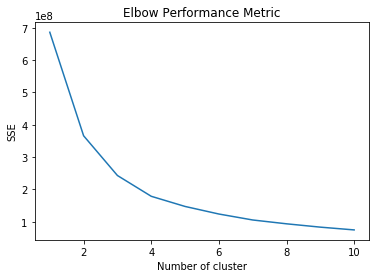

In [6]:
sse = {}
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, max_iter=1000).fit(dataset)
    sse[k] = kmeans.inertia_ # Inertia: Sum of distances of samples to their closest cluster center
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title("Elbow Performance Metric")
plt.xlabel("Number of cluster")
plt.ylabel("SSE")
plt.show()

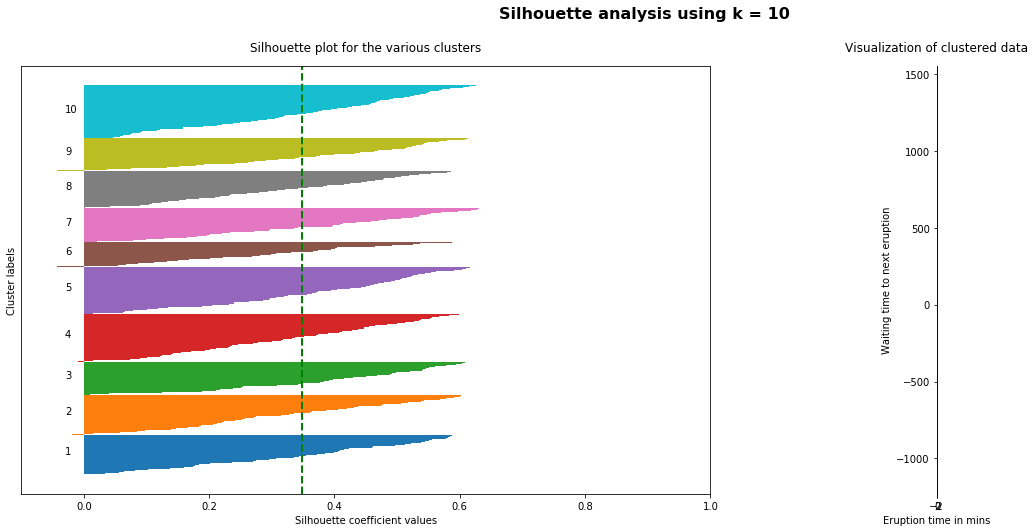

In [9]:
for i, k in enumerate([10]):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)
    
    # Run the Kmeans algorithm
    km = KMeans(n_clusters=10)
    labels = km.fit_predict(dataset)
    centroids = km.cluster_centers_

    # Get silhouette samples
    silhouette_vals = silhouette_samples(dataset, labels)

    # Silhouette plot
    y_ticks = []
    y_lower, y_upper = 0, 0
    for i, cluster in enumerate(np.unique(labels)):
        cluster_silhouette_vals = silhouette_vals[labels == cluster]
        cluster_silhouette_vals.sort()
        y_upper += len(cluster_silhouette_vals)
        ax1.barh(range(y_lower, y_upper), cluster_silhouette_vals, edgecolor='none', height=1)
        ax1.text(-0.03, (y_lower + y_upper) / 2, str(i + 1))
        y_lower += len(cluster_silhouette_vals)

    # Get the average silhouette score and plot it
    avg_score = np.mean(silhouette_vals)
    ax1.axvline(avg_score, linestyle='--', linewidth=2, color='green')
    ax1.set_yticks([])
    ax1.set_xlim([-0.1, 1])
    ax1.set_xlabel('Silhouette coefficient values')
    ax1.set_ylabel('Cluster labels')
    ax1.set_title('Silhouette plot for the various clusters', y=1.02);
    
    # Scatter plot of data colored with labels
    ax2.scatter(dataset[:, 0], dataset[:, 1], c=labels)
    ax2.scatter(centroids[:, 0], centroids[:, 1], marker='*', c='r', s=250)
    ax2.set_xlim([-2, 2])
    ax2.set_xlim([-2, 2])
    ax2.set_xlabel('Eruption time in mins')
    ax2.set_ylabel('Waiting time to next eruption')
    ax2.set_title('Visualization of clustered data', y=1.02)
    ax2.set_aspect('equal')
    plt.tight_layout()
    plt.suptitle(f'Silhouette analysis using k = {k}',
                 fontsize=16, fontweight='semibold', y=1.05);

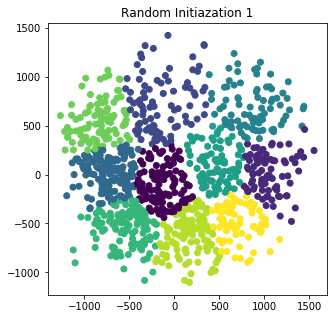

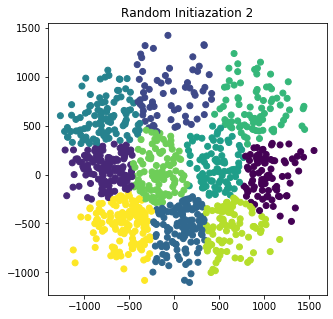

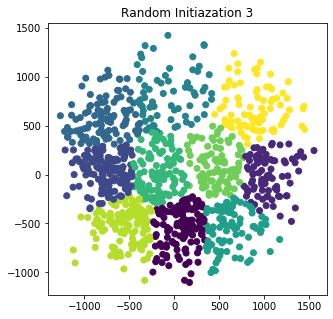

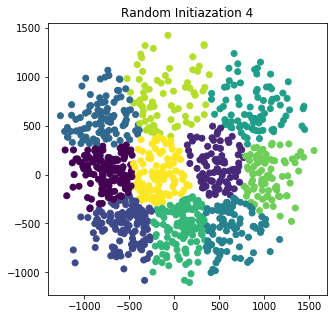

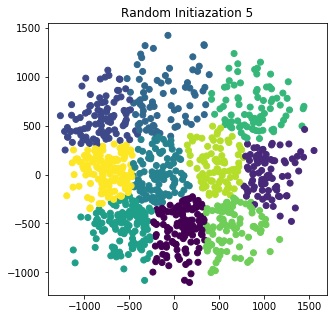

In [10]:
for i in range(1,6):
    # Run local implementation of kmeans
    km1_labels=KMeans(n_clusters=10,max_iter=300, random_state=np.random.randint(0, 255), n_init=10).fit_predict(dataset)
    fig = plt.figure(figsize=(5,5))
    ax = fig.add_subplot(111)
    scatter = ax.scatter(dataset[:,0],dataset[:,1],c=km1_labels)
    plt.title("Random Initiazation "+str(i))